<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/ImbalancedData_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from numpy import mean

In [3]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning /german.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
df[20].value_counts()

1    700
2    300
Name: 20, dtype: int64

In [7]:
X= df.iloc[:,0:20]
y=df.iloc[:,20]
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201


In [8]:
y= y.astype('category')

In [9]:
X.dtypes

0     object
1      int64
2     object
3     object
4      int64
5     object
6     object
7      int64
8     object
9     object
10     int64
11    object
12     int64
13    object
14    object
15     int64
16    object
17     int64
18    object
19    object
dtype: object

In [10]:
cat_ix = X.select_dtypes(include=['object']).columns
num_ix =X.select_dtypes(include=['int64']).columns
print(cat_ix)
print(num_ix)

Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')
Int64Index([1, 4, 7, 10, 12, 15, 17], dtype='int64')


In [11]:
for col in df[cat_ix]:
 df[col]=df[col].astype('category')


In [12]:
df.dtypes

0     category
1        int64
2     category
3     category
4        int64
5     category
6     category
7        int64
8     category
9     category
10       int64
11    category
12       int64
13    category
14    category
15       int64
16    category
17       int64
18    category
19    category
20       int64
dtype: object

In [13]:
#SCaling Numerical Columns
from  sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
data=[]
for i in X[num_ix]:
  data.append(i)
print(data)

X.iloc[:,data] =scaler.fit_transform(X.iloc[:,data])



[1, 4, 7, 10, 12, 15, 17]


In [14]:
#Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for i in X[cat_ix]:
  X.iloc[:,i] = encoder.fit_transform(X.iloc[:,i])
 
 
print(X.shape)
print(y.shape)


(1000, 20)
(1000,)


In [15]:
#from sklearn.model_selection import  train_test_split
#X_train, X_test, y_train, y_test = train_test_split(ndf,y)

#X_test.shape

In [16]:
#Define Function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_mod(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state=1)
  Scores= cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
  return Scores


In [17]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
from numpy import mean
model_Dummy= DummyClassifier(strategy='most_frequent')
Dummy_Score= round(mean(evaluate_mod(model_Dummy)),3)
print(f'Dummy Score: {Dummy_Score}')

Dummy Score: 0.7


In [18]:
#Decision Tree
from sklearn import tree

model_Dtree= tree.DecisionTreeClassifier()
Dtree_Score= round(mean(evaluate_mod(model_Dtree)),3)
print(f'Decison Tree Score: {Dtree_Score}')

Decison Tree Score: 0.688


In [19]:
#Support Vector Machine (SVM)
from sklearn import svm
from sklearn.svm import SVC
model_SVM= SVC(gamma='scale')

SVM_Score = round(mean(evaluate_mod(model_SVM)),3)

print(f'SVM Score: {SVM_Score}')

SVM Score: 0.759


In [20]:
#Bagged Decision Tree
from sklearn.ensemble import BaggingClassifier
model_BAG= BaggingClassifier()

BAG_Score= round(mean(evaluate_mod(model_BAG)),3)
print(f'Bagging Score: {BAG_Score}')

Bagging Score: 0.754


In [21]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier()

RF_Score= round(mean(evaluate_mod(model_RF)),3)
print(f'Random Forest Score: {RF_Score}')

Random Forest Score: 0.761


In [22]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model_GB= GradientBoostingClassifier()

GB_Score= round(mean(evaluate_mod(model_GB)),3)
print(f'Gradient Boosting Score: {GB_Score}')



Gradient Boosting Score: 0.769


In [23]:
#Extreme Gradient Boosting Score
from xgboost import XGBClassifier
model_XGB= XGBClassifier()

XGB_Score= round(mean(evaluate_mod(model_XGB)),3)
print(f'Extreme Gradient Boosting {XGB_Score}')



Extreme Gradient Boosting 0.775


In [24]:
ndf= pd.DataFrame({
    "Models" : ["Dummy", "Decision tree", "SVM", "Random Forest", "Bagging", "Gradient Boosting", "Extreme Boosting"],
    "Scores" : [Dummy_Score, Dtree_Score, SVM_Score, BAG_Score, RF_Score, GB_Score, XGB_Score]
})

In [25]:
ndf_sorted =ndf.sort_values(["Scores"], ascending=True) 
ndf_sorted

,Models,Scores
1,Decision tree,0.688
0,Dummy,0.700
3,Random Forest,0.754
2,SVM,0.759
4,Bagging,0.761
5,Gradient Boosting,0.769
6,Extreme Boosting,0.775


In [26]:
#Feature Engineering
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
data2=[]
for i in X[cat_ix]:
  data2.append(i)
print(data2)

ndf =X.iloc[:,data2]

ndf.head()


[0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]


,0,2,3,5,6,8,9,11,13,14,16,18,19
0,0,4,4,4,4,2,0,0,2,1,2,1,0
1,1,2,4,0,2,1,0,0,2,1,2,0,0
2,3,4,7,0,3,2,0,0,2,1,1,0,0
3,0,2,3,0,3,2,2,1,2,2,2,0,0
4,0,3,0,0,2,2,0,3,2,2,2,0,0


In [27]:
#In feature selection, we aim to select the features which are highly dependent on the response.
#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect.
#In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

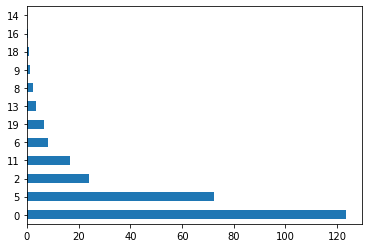

In [28]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(ndf, y)
fit.scores_

feat_importances = pd.Series(fit.scores_, index=ndf.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [29]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,-1.236478,4,4,-0.745131,4,4,0.918477,2,0,1.046987,0,2.766456,2,1,1.027079,2,-0.428290,1,0
1,1,2.248194,2,4,0.949817,0,2,-0.870183,1,0,-0.765977,0,-1.191404,2,1,-0.704926,2,-0.428290,0,0
2,3,-0.738668,4,7,-0.416562,0,3,-0.870183,2,0,0.140505,0,1.183312,2,1,-0.704926,1,2.334869,0,0
3,0,1.750384,2,3,1.634247,0,3,-0.870183,2,2,1.046987,1,0.831502,2,2,-0.704926,2,2.334869,0,0
4,0,0.256953,3,0,0.566664,0,2,0.024147,2,0,1.046987,3,1.535122,2,2,1.027079,2,2.334869,0,0


In [30]:
XX= X.drop([14,16,18,9,8,13], axis=1)

In [31]:
#Define Function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import recall_score
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state=1)
  Scores= cross_val_score(model, XX, y, cv=cv, scoring='recall', n_jobs=-1)
  return Scores

In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_LOG = LogisticRegression()

LOG_Score= evaluate_model(model_LOG)
print("%0.2f accuracy with a standard deviation of %0.2f" % (LOG_Score.mean(), LOG_Score.std()))

0.89 accuracy with a standard deviation of 0.04


In [33]:
#Decision Tree
from sklearn import tree

model_Dtree= tree.DecisionTreeClassifier()
Dtree_Score= evaluate_model(model_Dtree)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Dtree_Score.mean(), Dtree_Score.std()))

0.76 accuracy with a standard deviation of 0.06


In [34]:
#Support Vector Machine (SVM)
from sklearn import svm
from sklearn.svm import SVC
model_SVM= SVC(gamma='scale')

SVM_Score = evaluate_model(model_SVM)
print("%0.2f accuracy with a standard deviation of %0.2f" % (SVM_Score.mean(), SVM_Score.std()))

0.91 accuracy with a standard deviation of 0.03


In [35]:
#Bagged Decision Tree
from sklearn.ensemble import BaggingClassifier
model_BAG= BaggingClassifier()

BAG_Score= evaluate_model(model_BAG)
print("%0.2f accuracy with a standard deviation of %0.2f" % (BAG_Score.mean(), BAG_Score.std()))

0.88 accuracy with a standard deviation of 0.04


In [36]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier()

RF_Score= evaluate_model(model_RF)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_Score.mean(), RF_Score.std()))

0.91 accuracy with a standard deviation of 0.03


In [37]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model_GB= GradientBoostingClassifier()

GB_Score= evaluate_model(model_GB)
print("%0.2f accuracy with a standard deviation of %0.2f" % (GB_Score.mean(), GB_Score.std()))

0.88 accuracy with a standard deviation of 0.03


In [38]:
#Extreme Gradient Boosting Score
from xgboost import XGBClassifier
model_XGB= XGBClassifier()

XGB_Score= evaluate_model(model_XGB)
print("%0.2f accuracy with a standard deviation of %0.2f" % (XGB_Score.mean(), XGB_Score.std()))

0.89 accuracy with a standard deviation of 0.04


Recall  Score

In [39]:
ndf= pd.DataFrame({
    "Models" : ["Dummy", "Logistic Regression", "Decision tree", "SVM", "Random Forest", "Bagging", "Gradient Boosting", "Extreme Boosting"],
    "Recall Scores" : [Dummy_Score.mean(),LOG_Score.mean(), Dtree_Score.mean(), SVM_Score.mean(), BAG_Score.mean(), RF_Score.mean(), GB_Score.mean(), XGB_Score.mean()],
    "Variance":[Dummy_Score.std(),LOG_Score.std(), Dtree_Score.std(), SVM_Score.std(), BAG_Score.std(), RF_Score.std(), GB_Score.std(), XGB_Score.std()],
})
ndf["Variance"]= ndf["Variance"].apply(np.square)

ndf

,Models,Recall Scores,Variance
0,Dummy,0.700000,0.000000
1,Logistic Regression,0.887619,0.001248
2,Decision tree,0.760476,0.003071
3,SVM,0.906190,0.000730
4,Random Forest,0.881429,0.001893
5,Bagging,0.908095,0.000785
6,Gradient Boosting,0.884762,0.001156
7,Extreme Boosting,0.891905,0.001329


In [41]:
ndf_sorted = ndf.sort_values(["Recall Scores"], ascending=True) 
ndf_sorted

,Models,Recall Scores,Variance
0,Dummy,0.700000,0.000000
2,Decision tree,0.760476,0.003071
4,Random Forest,0.881429,0.001893
6,Gradient Boosting,0.884762,0.001156
1,Logistic Regression,0.887619,0.001248
7,Extreme Boosting,0.891905,0.001329
3,SVM,0.906190,0.000730
5,Bagging,0.908095,0.000785
